In [3]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
#data collection and preprocessing
#loading csv data to pandas data frame
gold_data=pd.read_csv('gld_price_data.csv')

In [6]:
#printing first 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
#printing the last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
#no of rows and columns
gold_data.shape

(2290, 6)

In [9]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [13]:
#finding corelation 
correlation=gold_data.corr()

<AxesSubplot:>

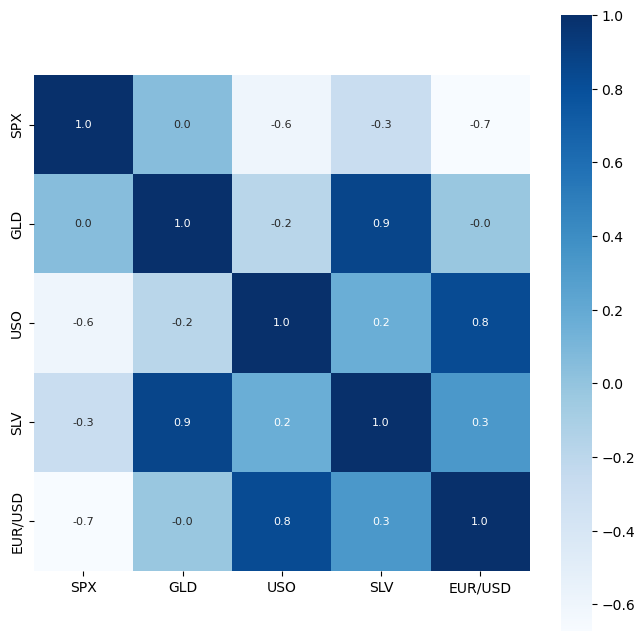

In [14]:
#constructing heatmap to understand corelation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,annot=True,cbar=True,square=True,fmt='.1f',annot_kws={'size':8},cmap='Blues')

In [15]:
#corelation values of GLD
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

/Users/indukanduri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

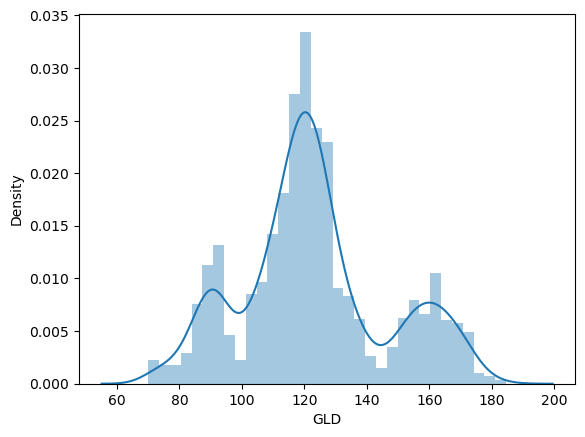

In [16]:
#Checking the distribution of the gld price
sns.distplot(gold_data['GLD'])

In [17]:
#spliting the features and target
X=gold_data.drop(['Date','GLD'],1)
y=gold_data.GLD

/var/folders/6x/g554_gln247357zv04bbvzkh0000gn/T/ipykernel_88515/1693566971.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=gold_data.drop(['Date','GLD'],1)


In [18]:
#spliting data into train and test data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [20]:
#Model Training
regressor=RandomForestRegressor(n_estimators=100)

In [21]:
#traing the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [22]:
#prediction on test data
test_data_prediction=regressor.predict(x_test)

In [25]:
error_score=metrics.r2_score(y_test,test_data_prediction)

In [28]:
error_score

0.9893776783197797

In [30]:
#compare the actual values and predicted values in matplot
Y_test=list(y_test)


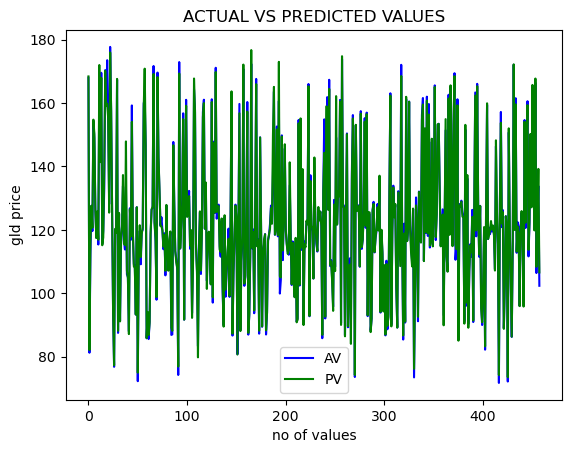

In [31]:
plt.plot(Y_test,color='blue',label='AV')
plt.plot(test_data_prediction,color='Green',label='PV')
plt.title('ACTUAL VS PREDICTED VALUES')
plt.xlabel('no of values')
plt.ylabel('gld price')
plt.legend()
plt.show()